In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Housing.csv')
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
df_numeric = df.select_dtypes(include=[np.number])

In [7]:
df_numeric = df.select_dtypes(include=[np.number])

In [8]:
X = df_numeric.drop('price', axis=1)  # assuming 'price' is the target
y = df_numeric['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1127483.3523235186
Mean Squared Error (MSE): 2292721545725.3613
R-squared (R²): 0.5464062355495873


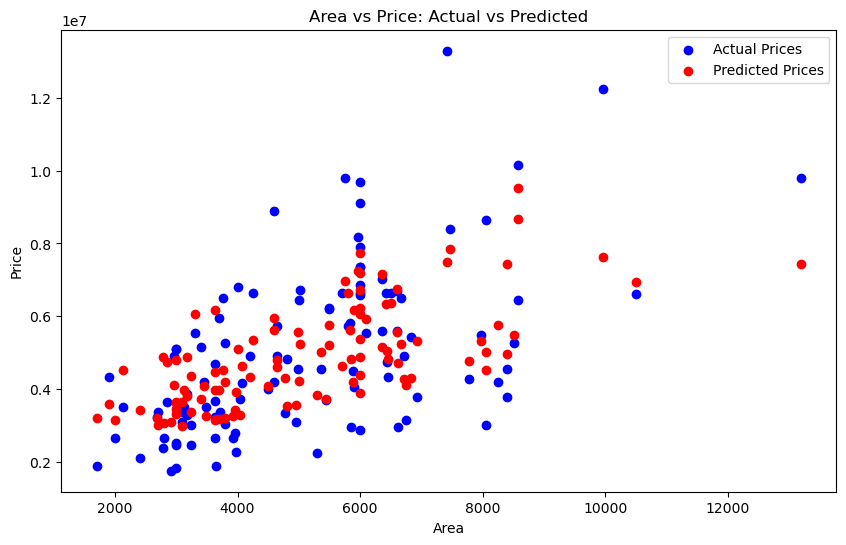

In [15]:
if 'area' in X.columns:
    plt.figure(figsize=(10,6))
    plt.scatter(X_test['area'], y_test, color='blue', label="Actual Prices")
    plt.scatter(X_test['area'], y_pred, color='red', label="Predicted Prices")
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Area vs Price: Actual vs Predicted')
    plt.legend()
    plt.show()

In [16]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
     Feature   Coefficient
0       area  3.088670e+02
1   bedrooms  1.512468e+05
2  bathrooms  1.185732e+06
3    stories  4.951008e+05
4    parking  3.376608e+05
